In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Install necessary libraries
%pip install rasterio earthpy matplotlib numpy

In [3]:
# Import required libraries
import glob
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import earthpy.plot as ep
from rasterio.plot import show

# Define the path to your images
image_paths = sorted(glob.glob('/content/drive/MyDrive/RS_Lab/3/images/*.tif'))

In [4]:
from skimage import exposure

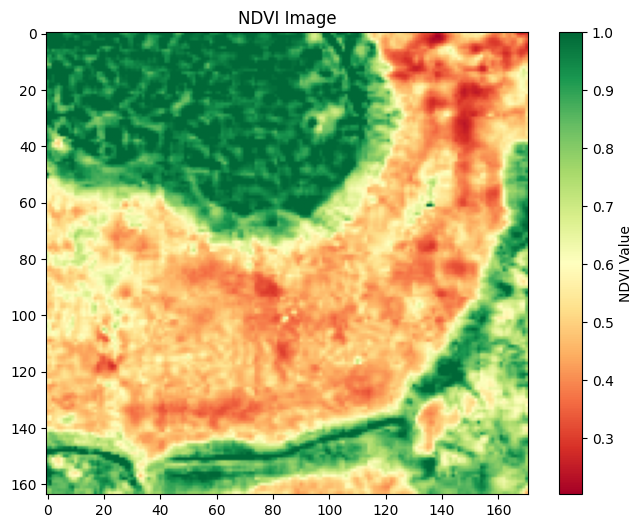

In [5]:
# Define the paths to the NIR and RED images
nir_image_path = '/content/drive/MyDrive/RS_Lab/3/images/MODIS_18Dec17_NIR.tif'
red_image_path = '/content/drive/MyDrive/RS_Lab/3/images/MODIS_18Dec17_RED.tif'

# Step 1: Read the NIR and RED bands using rasterio
with rasterio.open(nir_image_path) as src_nir:
    nir_band = src_nir.read(1)

with rasterio.open(red_image_path) as src_red:
    red_band = src_red.read(1)

# Step 2: Calculate the NDVI
ndvi = (nir_band - red_band) / (nir_band + red_band)

# Step 3: Plot the NDVI image
plt.figure(figsize=(8, 6))
plt.imshow(ndvi, cmap='RdYlGn')  # Use a colormap to visualize NDVI (green for vegetation)
plt.colorbar(label='NDVI Value')
plt.title('NDVI Image')
plt.show()


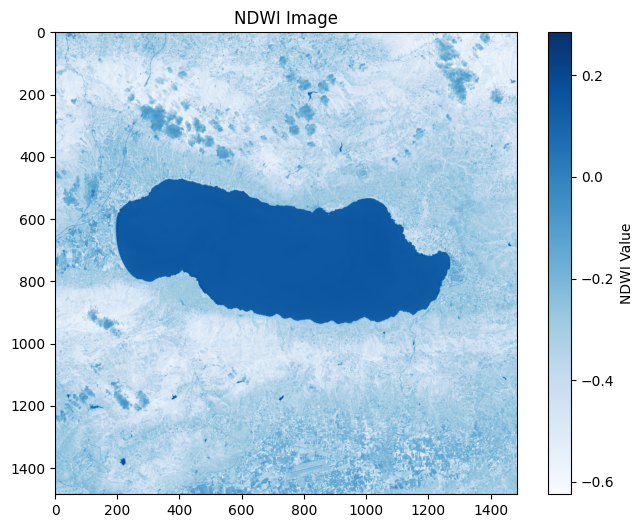

In [6]:
green_image_path = '/content/drive/MyDrive/RS_Lab/3/images/B3.tif'
nir_image_path = '/content/drive/MyDrive/RS_Lab/3/images/B5.tif'

with rasterio.open(green_image_path) as src_green:
    green_band = src_green.read(1).astype('float32')

with rasterio.open(nir_image_path) as src_nir:
    nir_band = src_nir.read(1).astype('float32')

ndwi = (green_band - nir_band) / (green_band + nir_band)

plt.figure(figsize=(8, 6))
plt.imshow(ndwi, cmap='Blues')
plt.colorbar(label='NDWI Value')
plt.title('NDWI Image')
plt.show()


#### Indices for Landsat8 and Sentinel2 images

In [7]:
# File paths
nir_image_path = '/content/drive/MyDrive/RS_Lab/3/landsat/LC09_L2SP_146050_20250303_20250304_02_T1_SR_B5.TIF'
red_image_path = '/content/drive/MyDrive/RS_Lab/3/landsat/LC09_L2SP_146050_20250303_20250304_02_T1_SR_B4.TIF'
blue_image_path = '/content/drive/MyDrive/RS_Lab/3/landsat/LC09_L2SP_146050_20250303_20250304_02_T1_SR_B2.TIF'
green_image_path = '/content/drive/MyDrive/RS_Lab/3/landsat/LC09_L2SP_146050_20250303_20250304_02_T1_SR_B3.TIF'
swir1_image_path = '/content/drive/MyDrive/RS_Lab/3/landsat/LC09_L2SP_146050_20250303_20250304_02_T1_SR_B6.TIF'

# Step 1: Read the bands using rasterio
def read_band(path):
    with rasterio.open(path) as src:
        return src.read(1).astype(float)

nir_band = read_band(nir_image_path)
red_band = read_band(red_image_path)
blue_band = read_band(blue_image_path)
green_band = read_band(green_image_path)
swir1_band = read_band(swir1_image_path)

# Step 2: Calculate indices
ndvi = (nir_band - red_band) / (nir_band + red_band + 1e-10)  # NDVI
ndwi = (green_band - nir_band) / (green_band + nir_band + 1e-10)  # NDWI
ndsi = (green_band - swir1_band) / (green_band + swir1_band + 1e-10)  # NDSI
savi = ((nir_band - red_band) / (nir_band + red_band + 0.5)) * (1.5)  # SAVI

# Step 3: Create True Color RGB Image
def normalize(array):
    return np.clip((array - np.percentile(array, 2)) / (np.percentile(array, 98) - np.percentile(array, 2) + 1e-10), 0, 1)

rgb_image = np.dstack((
    normalize(red_band),
    normalize(green_band),
    normalize(blue_band)
))

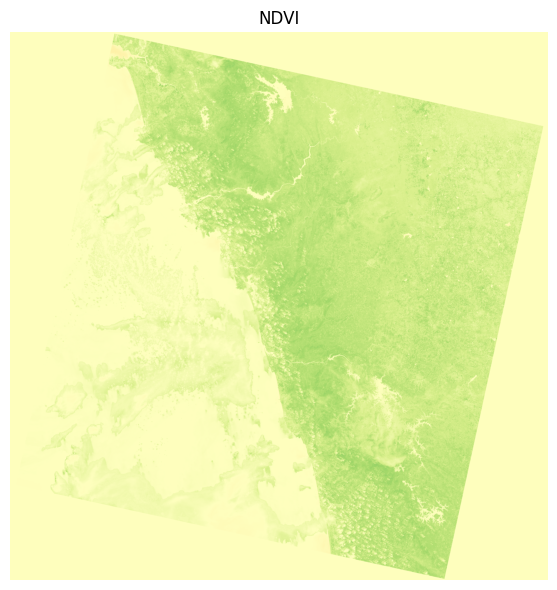

In [8]:
# ---------- Choose one to plot ----------
img_to_plot = ndvi; cmap = 'RdYlGn'; title = "NDVI"
# img_to_plot = ndwi; cmap = 'Blues'; title = "NDWI"
# img_to_plot = ndsi; cmap = 'coolwarm'; title = "NDSI"
# img_to_plot = savi; cmap = 'viridis'; title = "SAVI"
# rgb_stretched = exposure.equalize_hist(rgb_image)
# img_to_plot = rgb_stretched; cmap = None; title = "Enhanced True Color (RGB)"

# Plot
plt.figure(figsize=(8, 6))
plt.imshow(img_to_plot, cmap=cmap)
plt.title(title)
plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
green_image_path = '/content/drive/MyDrive/RS_Lab/3/sentinel/R20m/T30UXF_20250306T110829_B03_20m.jp2'
red_image_path = '/content/drive/MyDrive/RS_Lab/3/sentinel/R20m/T30UXF_20250306T110829_B04_20m.jp2'
nir_image_path = '/content/drive/MyDrive/RS_Lab/3/sentinel/R20m/T30UXF_20250306T110829_B8A_20m.jp2'
swir1_image_path = '/content/drive/MyDrive/RS_Lab/3/sentinel/R20m/T30UXF_20250306T110829_B11_20m.jp2'
blue_image_path = '/content/drive/MyDrive/RS_Lab/3/sentinel/R20m/T30UXF_20250306T110829_B02_20m.jp2'

# Function to read and normalize bands
def read_band(path):
    with rasterio.open(path) as src:
        return src.read(1).astype(float)

def normalize(array):
    return np.clip((array - np.percentile(array, 2)) / (np.percentile(array, 98) - np.percentile(array, 2) + 1e-10), 0, 1)


# Step 1: Read the bands
green_band = read_band(green_image_path)
red_band = read_band(red_image_path)
nir_band = read_band(nir_image_path)
swir1_band = read_band(swir1_image_path)
blue_band = read_band(blue_image_path)

# Step 2: Calculate indices
ndvi = (nir_band - red_band) / (nir_band + red_band + 1e-10)
ndwi = (green_band - nir_band) / (green_band + nir_band + 1e-10)
ndsi = (green_band - swir1_band) / (green_band + swir1_band + 1e-10)
savi = ((nir_band - red_band) / (nir_band + red_band + 0.5)) * (1.5)

# Step 3: Create True Color RGB Image
rgb_image = np.dstack((
    normalize(red_band),
    normalize(green_band),
    normalize(blue_band)
))

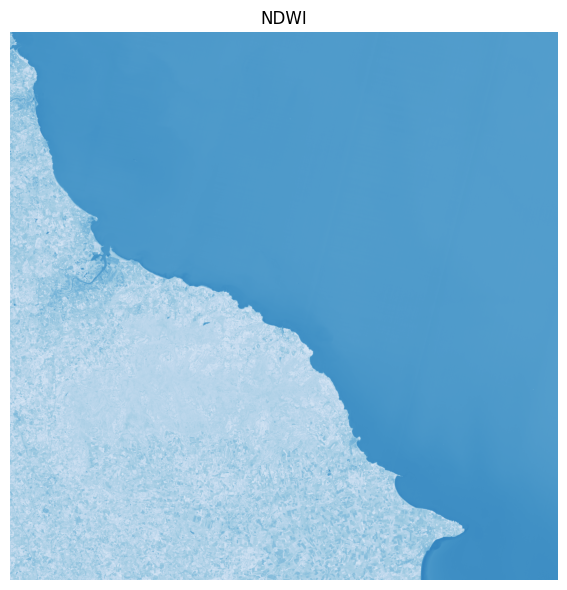

In [12]:
# ----------- Choose one to display -----------
# img = ndvi; cmap = 'RdYlGn'; title = "NDVI"
img = ndwi; cmap = 'Blues'; title = "NDWI"
# img = ndsi; cmap = 'coolwarm'; title = "NDSI"
# img = savi; cmap = 'viridis'; title = "SAVI"
# rgb_stretched = exposure.equalize_hist(rgb_image)
# img = rgb_stretched; cmap = None; title = "Enhanced True Color (RGB)"

# Plot selected image
plt.figure(figsize=(8, 6))
plt.imshow(img, cmap=cmap)
plt.title(title)
plt.axis('off')
plt.tight_layout()
plt.show()


